In [46]:
import numpy as np
from sklearn.datasets import fetch_mldata
import seaborn as sns

In [47]:
mnist = fetch_mldata("MNIST original")

In [48]:
X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [49]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print ('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [50]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

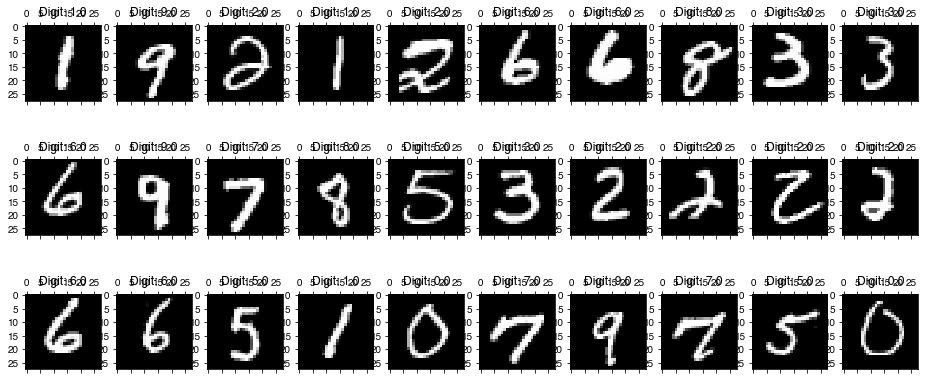

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca_one'] = pca_result[:,0]
df['pca_two'] = pca_result[:,1] 
df['pca_three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


In [53]:
df["target"] = df.label.astype(float)

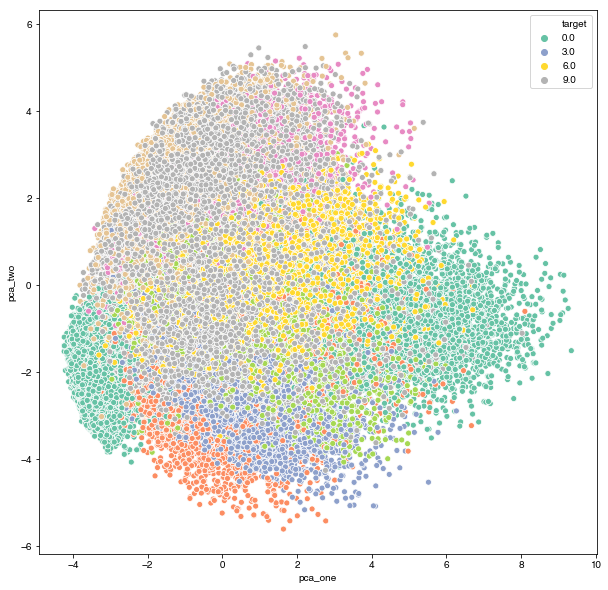

In [56]:
plt.figure(figsize=(10,10))
#sns.relplot(x="pca_one", y="pca_two", hue="label", data=df)
sns.scatterplot(x="pca_one", y="pca_two", hue="target", palette="Set2", data=df)

In [37]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.614s...
[t-SNE] Computed neighbors for 7000 samples in 57.302s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.238858
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.175575
[t-SNE] Error after 300 iterations: 2.439398
t-SNE done! Time elapsed: 142.03523874282837 seconds


In [38]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x_tsne'] = tsne_results[:,0]
df_tsne['y_tsne'] = tsne_results[:,1]

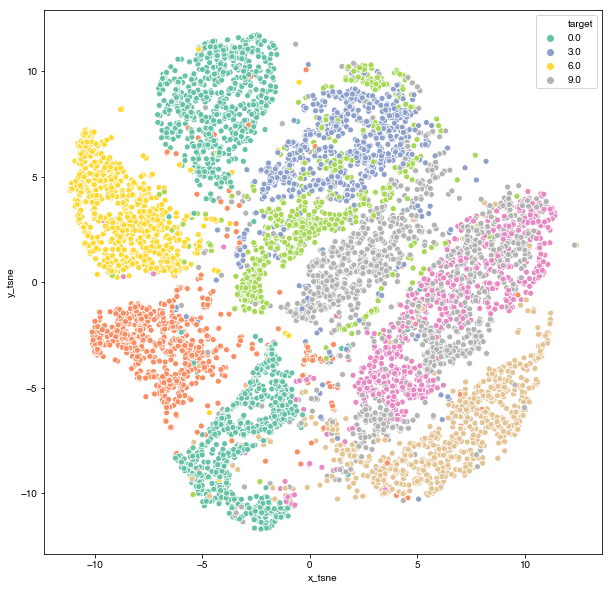

In [44]:
#sns.relplot(x="pca_one", y="pca_two", hue="label", data=df)
plt.figure(figsize=(10,10))
sns.scatterplot(x="x_tsne", y="y_tsne", hue="target", palette="Set2", data=df_tsne)

# Swiss Dataset

In [63]:
swiss = pd.read_csv("swiss.csv")

In [66]:
swiss.columns

Index(['canton', 'Fertility', 'Agriculture', 'Examination', 'Education',
       'Catholic', 'InfantMortality'],
      dtype='object')

In [67]:
swiss.head(5)

,canton,Fertility,Agriculture,Examination,Education,Catholic,InfantMortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [78]:
time_start = time.time()
feat_cols = ['Fertility', 'Agriculture', 'Examination', 'Education','Catholic', 'InfantMortality']
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=250)
tsne_results = tsne.fit_transform(swiss[feat_cols].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 47 samples in 0.000s...
[t-SNE] Computed neighbors for 47 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 47 / 47
[t-SNE] Mean sigma: 14.885222
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.381382
[t-SNE] Error after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
t-SNE done! Time elapsed: 0.18792390823364258 seconds


In [79]:
swiss_tsne = swiss.copy()
swiss_tsne['x_tsne'] = tsne_results[:,0]
swiss_tsne['y_tsne'] = tsne_results[:,1]

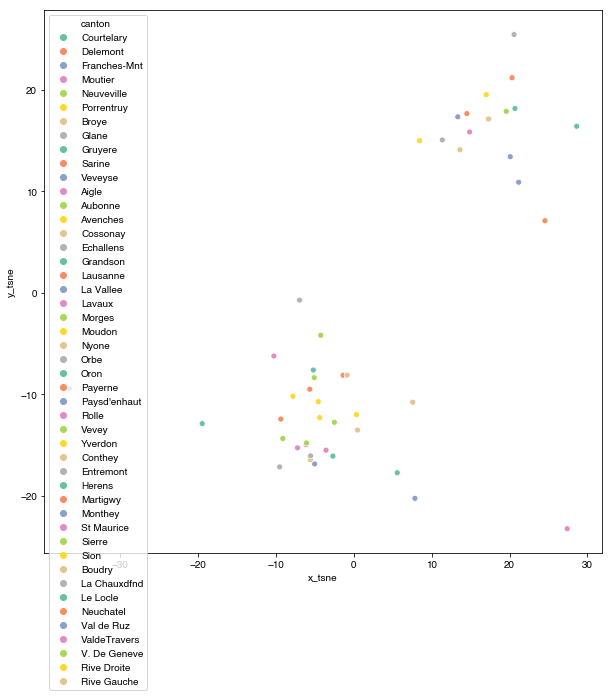

In [80]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="x_tsne", y="y_tsne", hue="canton", palette="Set2", data=swiss_tsne)

In [83]:
swiss_tsne[(swiss_tsne.x_tsne>0 )& (swiss_tsne.y_tsne>0)].canton

1         Delemont
2     Franches-Mnt
5       Porrentruy
6            Broye
7            Glane
8          Gruyere
9           Sarine
10         Veveyse
30         Conthey
31       Entremont
32          Herens
33        Martigwy
34         Monthey
35      St Maurice
36          Sierre
37            Sion
Name: canton, dtype: object

In [85]:
swiss_tsne[((swiss_tsne.x_tsne<0 ) | (swiss_tsne.y_tsne<0))].canton

0       Courtelary
3          Moutier
4       Neuveville
11           Aigle
12         Aubonne
13        Avenches
14        Cossonay
15       Echallens
16        Grandson
17        Lausanne
18       La Vallee
19          Lavaux
20          Morges
21          Moudon
22           Nyone
23            Orbe
24            Oron
25         Payerne
26    Paysd'enhaut
27           Rolle
28           Vevey
29         Yverdon
38          Boudry
39    La Chauxdfnd
40        Le Locle
41       Neuchatel
42      Val de Ruz
43    ValdeTravers
44    V. De Geneve
45     Rive Droite
46     Rive Gauche
Name: canton, dtype: object

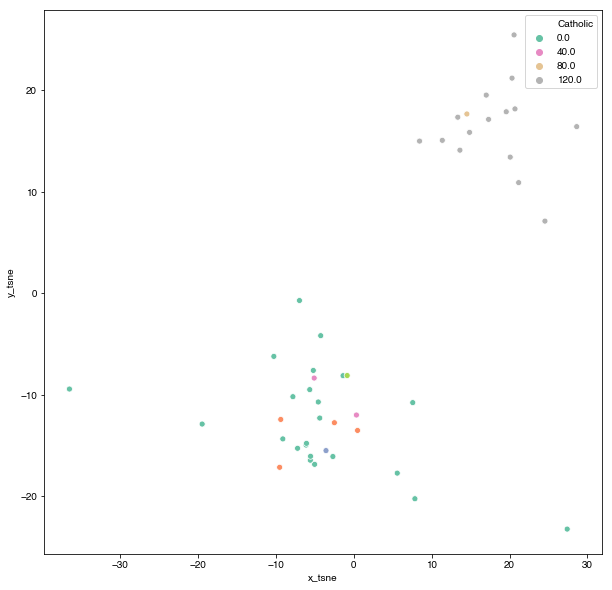

In [86]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="x_tsne", y="y_tsne", hue="Catholic", palette="Set2", data=swiss_tsne)